# Example Use

A short demonstration of the custom model against a industry standard '*sklearn LinearRegression*'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# random seed for reproducibility
R = 123

# the model that we will use as a benchmark
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# use the regression from the .py file, that I have built
# This is a custom regression model that we will compare against sklearn's LinearRegression
from my_reg_OLS import *

In [2]:
"""
Import dataset for model performance comparison.
This dataset contains advertising budgets and sales data.
"""

# load simple advertising dataset, credit given to selva86
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv')

# removed "unnamed: 0" column, since we are only looking at the model performance for regression
df = df.drop(columns=['Unnamed: 0'])
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
"""
We have 3 features: TV, Radio, Newspaper
And 1 target variable: Sales
"""

# define features and target variable
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [4]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=R)

# Evaluate the performance of the custom regression model against the benchmark.
This will include:
1. Fitting both models to the same training data
2. Making predictions over both models
3. Calculating the mean squared error (MSE) for both models

We will also look at plots of the target variable (sales) against some of the features and see if there are any differences.

In [5]:
# fit sklearn's LinearRegression model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# fit my model
my_model = MyLinearReg(X_train, y_train)
my_model.fit()

# make predictions with both models
y_pred_sklearn = sklearn_model.predict(X_test)
y_pred_myreg = my_model.predict(X_test)

In [6]:
# calculate mean squared error for both models
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mse_myreg = mean_squared_error(y_test, y_pred_myreg)

# print the mean squared error for both models
print(f"Mean Squared Error (sklearn): {mse_sklearn:.5f}")
print(f"Mean Squared Error (MyLinearReg): {mse_myreg:.5f}")

Mean Squared Error (sklearn): 2.20301
Mean Squared Error (MyLinearReg): 2.20301


In [7]:
# find the coefficients and intercepts of the models
slope_sklearn = sklearn_model.coef_
slope_myreg = my_model.get_coefficients()
print(f"Coefficients (sklearn): {slope_sklearn}")
print(f"Coefficients (MyLinearReg): {slope_myreg}\n")

# intercepts of the models
int_sklearn = sklearn_model.intercept_
int_myreg = my_model.get_intercept()
print(f"Intercept (sklearn): {int_sklearn}")
print(f"Intercept (MyLinearReg): {int_myreg}")

Coefficients (sklearn): [ 0.04558897  0.18653389 -0.00063032]
Coefficients (MyLinearReg): [ 0.04558897  0.18653389 -0.00063032]

Intercept (sklearn): 2.9242267872501273
Intercept (MyLinearReg): 2.9242267872501544


# Summary

My regression build has come to the exact same conclusion as the sklearn LinearRegression model. The simple proof of concept is seemingly a success.

In [ ]:
# make predictions on the testing data
y_pred_sklearn = sklearn_model.predict(X_test)
y_pred_myreg = my_model.predict(X_test)

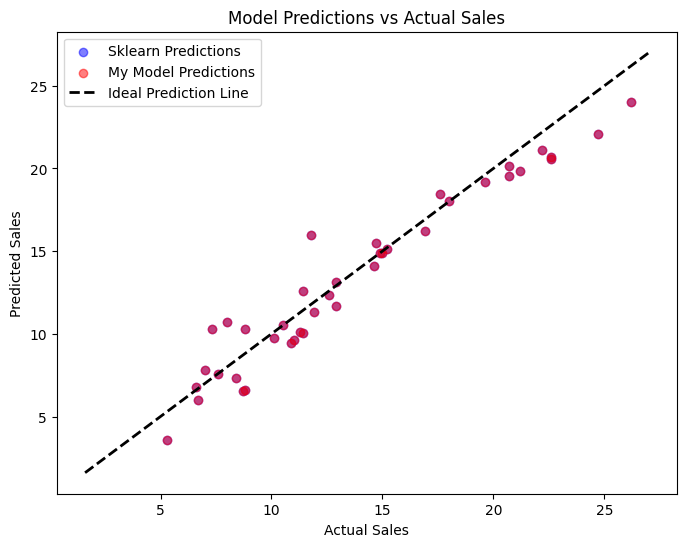

In [13]:
# plot the predictions of both models against the actual values
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_sklearn, c='blue', label='Sklearn Predictions', alpha=0.5)
plt.scatter(y_test, y_pred_myreg, c='red', label='My Model Predictions', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Model Predictions vs Actual Sales')
plt.legend()
plt.show()

Unsurprisingly, both models predicted the same values, whatever performance metric we use is irrelevant and will be the same.